# The Vector Model and the rotating frame of reference （演習Q.2のまとめ）

ベクトルモデルに基づいて，強度$\omega_1$，角周波数$\omega_0$のRFパルスを照射したときの磁化の変位を回転行列を順次かけることで計算した。

磁化は磁場$\boldsymbol{B}$の周りに速さ$\omega = \gamma|\boldsymbol{B}|$で回転運動する。
以後，磁場の強さを角周波数単位で表現する。

## πパルスだけのパターン

まず，y方向の180°(π)パルス（強度$\omega_1$，角周波数$\omega_0$）を照射することを考える。

- オンレゾナンスの場合，はじめZ方向にあった磁化は，y軸周りに180°回転する。
- オンレゾナンスでない一般の場合，磁化は有効磁場
  $\boldsymbol{B}_\mathrm{eff} = \omega_1 \boldsymbol{j} + \Delta\omega\boldsymbol{k}$
（$\Delta\omega = \omega - \omega_0$はオフレゾナンス周波数）を軸として回転運動する。
  このとき，回転運動の速さは
  $|\boldsymbol{B}_\mathrm{eff}|/\omega_1$倍になる。
  
したがって，

1. まず有効磁場の方向と軸の方向が一致するように回転させ，
2. y軸周りに$180 \times |\boldsymbol{B}_\mathrm{eff}|/\omega_1$°だけ回転させ，
3. 1.で傾けた有効磁場の向きをもとに戻すように回転させる

ことで照射後の磁化の向きがわかる。

具体的には，有効磁場のy軸からの角度が$\theta$で，
初期状態が$\boldsymbol{M}_ 0 = (0, 0, 1)^T$である磁化に対し，回転行列
$R_x(\theta_\mathrm{rot}) = \begin{pmatrix}1 & 0 & 0\\0 & \cos{\left (\theta_\mathrm{rot} \right )} & - \sin{\left (\theta_\mathrm{rot} \right )}\\0 & \sin{\left (\theta_\mathrm{rot} \right )} & \cos{\left (\theta_\mathrm{rot} \right )}\end{pmatrix}$
，
$R_y(\theta_\mathrm{rot}) = \begin{pmatrix}\cos{\left (\theta_\mathrm{rot} \right )} & 0 & \sin{\left (\theta_\mathrm{rot} \right )}\\0 & 1 & 0\\- \sin{\left (\theta_\mathrm{rot} \right )} & 0 & \cos{\left (\theta_\mathrm{rot} \right )}\end{pmatrix}$
（それぞれx軸，y軸周りに$\theta_\mathrm{rot}$ radだけ左回りに回転）
を次のようにかけて得られたベクトル$\boldsymbol{M}_{y\pi}$がπパルス照射後の磁化である：

$$\boldsymbol{M}_{y\pi} = R_x(\theta)R_y(\pi/\cos\theta)R_x(-\theta)\boldsymbol{M}_0$$


オフレゾナンス周波数$\Delta\omega$が与えられたときは
$\theta = \arctan(\Delta\omega/\omega_0)$
などとして同様に計算できる。

## composite pulse の場合

(π/2ω<sub>1</sub>)<sub>y</sub>
(π/ω<sub>1</sub>)<sub>x</sub>
(π/2ω<sub>1</sub>)<sub>y</sub> （y90°，x180°，y90°）という
パルスシーケンスを考える。

上と同様に考えると，

そのパルスにおける有効磁場の向きを軸の方向に傾ける→回転させる→傾けたのを元に戻す

という操作を3つのパルスについてそれぞれ行えばいいから，初期状態が$(0, 0, 1)^T$であるとき，
操作後の磁化は

$$\boldsymbol{M}_{\mathrm{composite}} =\left [R_x(\theta)R_y((\pi/2)/\cos\theta)R_x(-\theta)\right][R_y(-\theta)R_x(\pi/\cos\theta)R_y(\theta)] [R_x(\theta)R_y((\pi/2)/\cos\theta)R_x(-\theta)] \boldsymbol{M}_0$$

である。



---
# 実装

In [1]:
# import, 初期設定

from IPython.display import display
import numpy as np
from matplotlib import pyplot as plt

ここでは，与えられた回転角に対してx軸周りの回転行列を返す `Rx` 関数，同じくy軸周りの回転行列を返す `Ry` 関数を定義し，（$\omega_1$を基準にした）オフレゾナンス周波数$\Delta\omega$を横軸にとってパルスがかけられた後の磁化のz成分をプロットした。

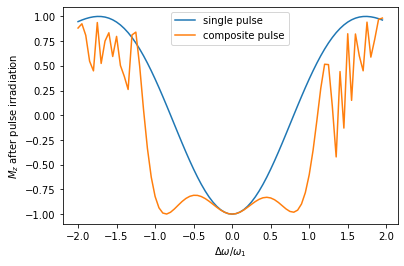

In [2]:
def Rx(angle):
    """
returns a rotation matrix around the x-axis by given angle(rad).
    :param angle: rotation angle (rad)
    :return: a rotation matrix around x axis
    """
    return np.array([
        [1,             0,              0],
        [0, np.cos(angle), -np.sin(angle)],
        [0, np.sin(angle),  np.cos(angle)]
    ])


def Ry(angle):
    """
returns a rotation matrix around the y-axis by given angle(rad).
    :param angle: rotation angle (rad)
    :return: a rotation matrix around y axis
    """
    return np.array([
        [ np.cos(angle), 0, np.sin(angle)],
        [             0, 1,             0],
        [-np.sin(angle), 0, np.cos(angle)]
    ])


"""
RF照射（横磁場）の強さ ω_1 を1としたときのオフレゾナンス周波数
"""
off_res = np.arange(
    start=-2,
    stop=2,
    step=0.05
)
z_0 = np.array([[0], [0], [1]])
magnet = []
magnet_composite = []

for i in off_res:
    _angle = np.arctan(i)
    res = Rx(_angle) @ Ry(np.pi / np.cos(_angle)) @ Rx(-_angle) @ z_0
    magnet.append(
        res[2, 0] # 磁化ベクトルの三行目一列目がz成分
    )

for i in off_res:
    ang = np.arctan(i)
    res = Rx(ang) @ Ry((np.pi / 2) / np.cos(i)) @ Rx(-ang) @ \
          Ry(-ang) @ Rx(np.pi / np.cos(ang)) @ Ry(ang) @ \
          Rx(ang) @ Ry((np.pi / 2) / np.cos(ang)) @ Rx(-ang) @ z_0
    magnet_composite.append(
        res[2, 0]
    )

# Plotting
plt.xlabel('$\\Delta\\omega / \\omega_1$')
plt.ylabel('$M_z$ after pulse irradiation')
plt.plot(off_res, magnet)
plt.plot(off_res, magnet_composite)
plt.legend(['single pulse', 'composite pulse'])

次に，有効磁場の水平面からの角度を横軸にとってプロットした。

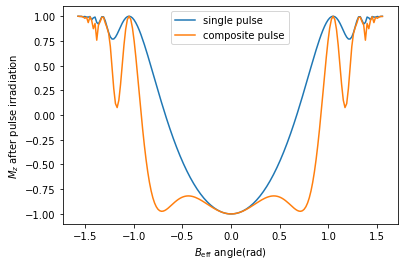

In [3]:
"""
有効磁場の角度
"""
beff_angle = np.arange(
    start=-90, #degree           
    stop = 90, #degree
    step =  1) * np.pi / 180

z_0 = np.array([[0], [0], [1]])
magnet = []
magnet_composite = []
for i in beff_angle:
    _angle = i
    res = Rx(_angle) @ Ry(np.pi/np.cos(_angle)) @ Rx(-_angle) @ z_0
    magnet.append(
        res[2,0]
    )

for i in beff_angle:
    ang = i
    res = Rx(ang) @ Ry((np.pi/2)/np.cos(i)) @ Rx(-ang) @ \
        Ry(-ang) @ Rx(np.pi/np.cos(ang)) @ Ry(ang) @ \
        Rx(ang) @ Ry((np.pi/2)/np.cos(ang)) @ Rx(-ang) @ z_0
    magnet_composite.append(
        res[2,0]
    )

plt.xlabel('$B_\mathrm{eff}$ angle(rad)')
plt.ylabel('$M_z$ after pulse irradiation')
plt.plot(beff_angle, magnet)
plt.plot(beff_angle, magnet_composite)
plt.legend(['single pulse', 'composite pulse'])

## SymPy行列による計算

最初にsympyで文字式に値を代入していく方針で書いたのですが
（LaTeX風に出力できて回転行列とかわかりやすいので），この実装だと計算速度がだいぶ遅くなってしまった
ので普通にNumPyの行列で実装しなおしたという経緯があります。

一応元の実装も残しておきます（実行すると若干時間がかかります）。

In [4]:
from sympy import init_printing, sin, cos, tan, sqrt, symbols, Symbol, pi
from sympy.matrices import Matrix, ImmutableMatrix

init_printing(use_latex=True)
rot_angle = Symbol('\\theta_\mathrm{rot}')
_Rx = Matrix([
    [ 1,              0,               0],
    [ 0, cos(rot_angle), -sin(rot_angle)],
    [ 0, sin(rot_angle),  cos(rot_angle)]
])

_Ry = Matrix([
    [ cos(rot_angle),  0, sin(rot_angle)],
    [              0,  1,              0],
    [-sin(rot_angle),  0, cos(rot_angle)]
])

def sRx(angle):
    return _Rx.subs(rot_angle, angle)

def sRy(angle):
    return _Ry.subs(rot_angle, angle)

# display(Symbol('R_{x}:'), _Rx)
# display(Symbol('R_{y}:'), _Ry)

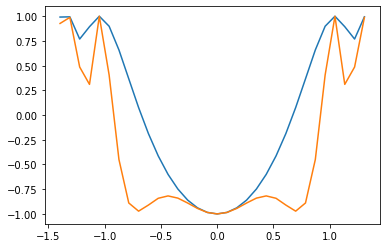

In [5]:

# Delta = np.arange(-10, 10, 0.05)

# effective field direction from axis (in radian)
effective_field_angle = np.arange(
    start=-80, #degree
    stop = 80, #degree
    step =  5) * np.pi / 180


z_0 = ImmutableMatrix([[0], [0], [1]])
magnet = []
magnet_composite = []
for i in effective_field_angle:
    magnet.append(
        sRx(-i + pi) * sRy(pi/cos(i)) * sRx( - pi + i) * z_0
    )

for i in effective_field_angle:
    magnet_composite.append(
        sRx(i) *
        sRy((pi / 2)/cos(i)) *
        sRx(-i) *
        
        sRy(-i) *
        sRx(pi/cos(i)) *
        sRy(i) *
        
        sRx(i) *
        sRy((pi / 2)/cos(i)) *
        sRx(-i) * z_0
    )

z_magnet = [i.row(2)[0] for i in magnet]
z_magnet_composite = [i.row(2)[0] for i in magnet_composite]
plt.plot(effective_field_angle, z_magnet)
plt.plot(effective_field_angle, z_magnet_composite)


## Pythonの補足

### SymPy

- 行列の積は `*`

### NumPy

- `ndarray` の積は `@` が使える (≧Python 3.5)
  - [`numpy.matmul`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html#numpy.matmul)と同じ
